<a href="https://colab.research.google.com/github/Avspraveenreddy/AML/blob/main/Assignment_Text_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - accuracy: 0.5514 - loss: 0.6904 - val_accuracy: 0.5027 - val_loss: 0.6942
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - accuracy: 0.4968 - loss: 0.6887 - val_accuracy: 0.5027 - val_loss: 0.6936
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step - accuracy: 0.5910 - loss: 0.6719 - val_accuracy: 0.5027 - val_loss: 0.6946
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 630ms/step - accuracy: 0.6108 - loss: 0.6486 - val_accuracy: 0.5027 - val_loss: 0.7001
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 617ms/step - accuracy: 0.6425 - loss: 0.6013 - val_accuracy: 0.5027 - val_loss: 0.7139
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - accuracy: 0.5841 - loss: 0.5439 - val_accuracy: 0.5028 - val_loss: 0.8661
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step - accuracy: 0.8054 - loss: 0.4996 - val_accuracy: 0.5220 - val_loss: 0.8075
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step - accuracy: 0.9291 - loss: 0.3875 - val_accuracy: 0.6023 - val_loss: 0.6675
Epo

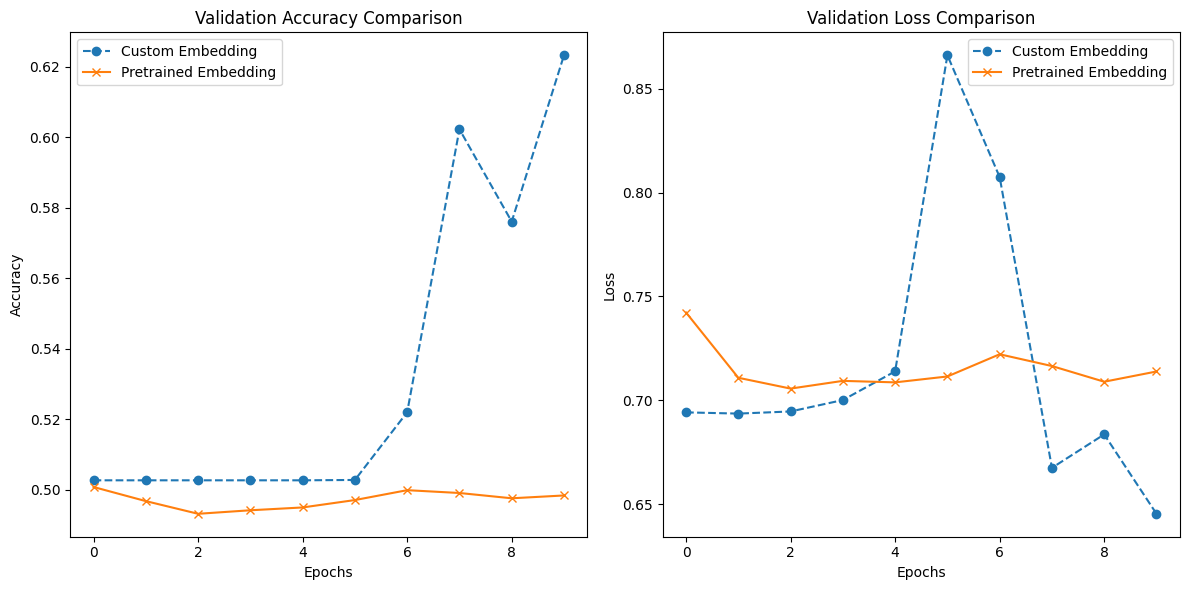

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5261 - loss: 0.6919 - val_accuracy: 0.5026 - val_loss: 0.6939
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5508 - loss: 0.6800 - val_accuracy: 0.5027 - val_loss: 0.6957
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5945 - loss: 0.6659 - val_accuracy: 0.5027 - val_loss: 0.6994
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6091 - loss: 0.6468 - val_accuracy: 0.5027 - val_loss: 0.7049
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5987 - loss: 0.6447 - val_accuracy: 0.5027 - val_loss: 0.7047
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6153 - loss: 0.6202 - val_accuracy: 0.5027 - val_loss: 0.7054
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6723 - loss: 0.6003 - val_accuracy: 0.5027 - val_loss: 0.7046
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7394 - loss: 0.5826 - val_accuracy: 0.5027 - val_loss: 0.7046
Epoch 9/10
4/4 ━

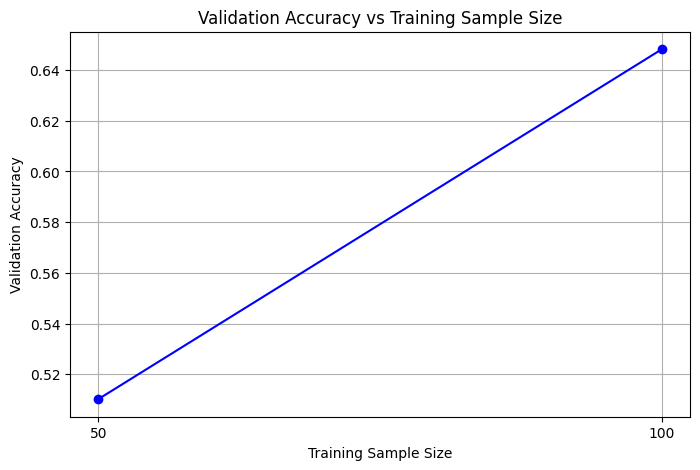

Training Size: 50, Validation Accuracy: 0.5102
Training Size: 100, Validation Accuracy: 0.6482


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Parameters
max_words = 10000  # Top 10,000 words
max_len = 150  # Cutoff reviews after 150 words
embedding_dim = 50  # Embedding dimensions
epochs = 10
batch_size = 16

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Restrict training samples to 100
x_train, y_train = np.array(x_train[:100], dtype=object), np.array(y_train[:100])

# Use 10,000 samples for validation
x_val, y_val = np.array(x_test[:10000], dtype=object), np.array(y_test[:10000])

x_train_pad = pad_sequences(x_train, maxlen=max_len)
x_val_pad = pad_sequences(x_val, maxlen=max_len)

def build_custom_embedding_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Bidirectional(LSTM(32)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def load_glove_embeddings(filepath):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

def create_embedding_matrix(word_index, embeddings_index, max_words, embedding_dim):
    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix


glove_path = '/content/glove.6B.50d.txt'
glove_embeddings = load_glove_embeddings(glove_path)
word_index = imdb.get_word_index()
embedding_matrix = create_embedding_matrix(word_index, glove_embeddings, max_words, embedding_dim)

def build_pretrained_embedding_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False),
        Bidirectional(LSTM(32)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


custom_model = build_custom_embedding_model()
history_custom = custom_model.fit(x_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_pad, y_val))


pretrained_model = build_pretrained_embedding_model()
history_pretrained = pretrained_model.fit(x_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val_pad, y_val))


def plot_training_comparison(history_custom, history_pretrained):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_custom.history['val_accuracy'], label='Custom Embedding', linestyle='--', marker='o')
    plt.plot(history_pretrained.history['val_accuracy'], label='Pretrained Embedding', linestyle='-', marker='x')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history_custom.history['val_loss'], label='Custom Embedding', linestyle='--', marker='o')
    plt.plot(history_pretrained.history['val_loss'], label='Pretrained Embedding', linestyle='-', marker='x')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_comparison(history_custom, history_pretrained)

sample_sizes = [50, 100]
results = {}

for size in sample_sizes:
    x_train_sample = np.array(x_train[:size], dtype=object)
    y_train_sample = np.array(y_train[:size])

    sample_model = build_custom_embedding_model()
    sample_history = sample_model.fit(
        pad_sequences(x_train_sample, maxlen=max_len), y_train_sample,
        epochs=epochs, batch_size=batch_size, validation_data=(x_val_pad, y_val)
    )

    results[size] = sample_history.history['val_accuracy'][-1]

def plot_sample_size_performance(results):
    plt.figure(figsize=(8, 5))
    plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='b')
    plt.title('Validation Accuracy vs Training Sample Size')
    plt.xlabel('Training Sample Size')
    plt.ylabel('Validation Accuracy')
    plt.xticks(list(results.keys()))
    plt.grid(True)
    plt.show()

plot_sample_size_performance(results)

for size, accuracy in results.items():
    print(f"Training Size: {size}, Validation Accuracy: {accuracy:.4f}")


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_val_pred_custom = custom_model.predict(x_val_pad)
y_val_pred_custom_binary = (y_val_pred_custom > 0.5).astype(int)

mse_custom = mean_squared_error(y_val, y_val_pred_custom_binary)
rmse_custom = np.sqrt(mse_custom)

print("Custom Embedding Model Evaluation:")
print(f"MSE: {mse_custom:.4f}")
print(f"RMSE: {rmse_custom:.4f}")

y_val_pred_pretrained = pretrained_model.predict(x_val_pad)
y_val_pred_pretrained_binary = (y_val_pred_pretrained > 0.5).astype(int)

mse_pretrained = mean_squared_error(y_val, y_val_pred_pretrained_binary)
rmse_pretrained = np.sqrt(mse_pretrained)

print("\nPretrained Embedding Model Evaluation:")
print(f"MSE: {mse_pretrained:.4f}")
print(f"RMSE: {rmse_pretrained:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Custom Embedding Model Evaluation:
MSE: 0.3767
RMSE: 0.6138
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Pretrained Embedding Model Evaluation:
MSE: 0.5016
RMSE: 0.7082
